In [85]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

[1] "data-set-for-prac2"      "practical-2-dataset-tsf"
[3] "subset-selection"

In [86]:
# TSF PRACTICAL 2: MULTIPLE LINEAR REGRESSION AND SUBSET SELECTION

In [87]:
# Multiple linear regression -
is a statistical technique that uses several explanatory variables to predict the outcome of a response variable.Simple linear regression is a function that allows an analyst or statistician to make predictions about one variable based on the information that is known about another variable. Linear regression can only be used when one has two continuous variables—an independent variable and a dependent variable. The independent variable is the parameter that is used to calculate the dependent variable or outcome. A multiple regression model extends to several explanatory variables.

ERROR: Error in parse(text = x, srcfile = src): <text>:2:4: unexpected symbol
1: # Multiple linear regression -
2: is a
      ^


In [88]:
# 1] Data2 CSV CW

In [89]:
data2=read.csv("../input/practical-2-dataset-tsf/data2.csv", header=TRUE)

In [90]:
head(data2)

,X,x1,x2,x3,x4,x5,x6,y
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,149,66,-15,150,105,383,267
2,2,143,66,5,115,105,383,269
3,3,149,73,5,150,105,383,230
4,4,143,73,-15,115,105,383,233
5,5,149,73,-15,115,78,383,222
6,6,143,66,-15,150,78,383,267


In [91]:
#X is serial number so we exclude it
data2=data2[,-1]

In [92]:
data2

x1,x2,x3,x4,x5,x6,y
<int>,<int>,<int>,<int>,<int>,<int>,<int>
149,66,-15,150,105,383,267
143,66,5,115,105,383,269
149,73,5,150,105,383,230
143,73,-15,115,105,383,233
149,73,-15,115,78,383,222
143,66,-15,150,78,383,267
143,73,5,150,78,383,231
149,66,5,115,78,383,260
149,73,-15,150,78,196,238


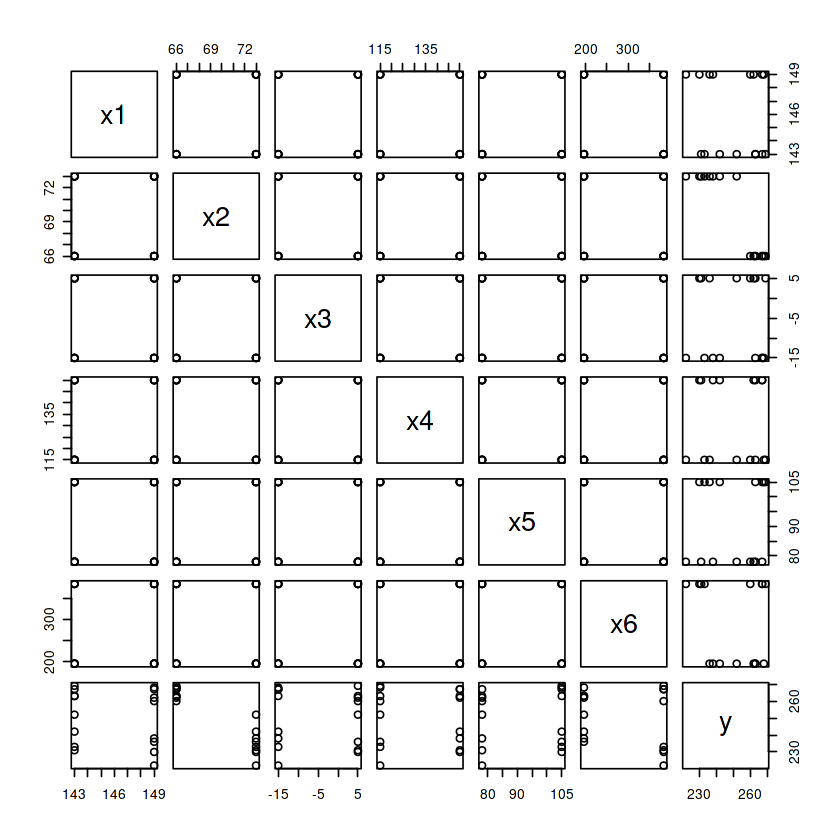

In [93]:
plot(data2)

In [94]:
model=lm(y~x1+x2+x3+x4+x5+x6, data=data2)

In [95]:
model


Call:
lm(formula = y ~ x1 + x2 + x3 + x4 + x5 + x6, data = data2)

Coefficients:
(Intercept)           x1           x2           x3           x4           x5  
  659.09562     -0.77083     -4.19643      0.01875     -0.01071      0.06019  
         x6  
   -0.03008  


In [96]:
S=summary(model)
S


Call:
lm(formula = y ~ x1 + x2 + x3 + x4 + x5 + x6, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
-7.812 -2.906 -0.250  3.250 11.812 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 659.09562   90.62154   7.273 4.70e-05 ***
x1           -0.77083    0.56319  -1.369    0.204    
x2           -4.19643    0.48273  -8.693 1.13e-05 ***
x3            0.01875    0.16896   0.111    0.914    
x4           -0.01071    0.09655  -0.111    0.914    
x5            0.06019    0.12515   0.481    0.642    
x6           -0.03008    0.01807  -1.665    0.130    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.758 on 9 degrees of freedom
Multiple R-squared:  0.8994,	Adjusted R-squared:  0.8323 
F-statistic: 13.41 on 6 and 9 DF,  p-value: 0.000489


In [97]:
* For x1 accept H0 B1=0; p>0.05
* For x2 reject H0 B2=0;  p<0.05
* For x3 accept H0 B3=0; p>0.05
* For x4 accept H0 B4=0; p>0.05
* For x5 accept H0 B5=0; p>0.05
* For x6 accept H0 B6=0; p>0.05

ERROR: Error in parse(text = x, srcfile = src): <text>:1:1: unexpected '*'
1: *
    ^


In [ ]:
R2=S$r.squared
R2

Adj_R2=S$adj.r.squared
Adj_R2

F=S$fstatistic
F

In [ ]:
A1=anova(model)
A1

In [ ]:
SS=A1$'Sum Sq'
SS

In [ ]:
SSR=sum(SS[1:6])
SSR

In [ ]:
MSR=SSR/6
MSR

In [ ]:
MSE=A1$'Mean Sq'[7]
MSE

In [ ]:
F1=MSR/MSE
F1
F=S$fstatistic
F[1]

In [ ]:
df1=F[2]
df1
df2=F[3]
df2
F_tab=qf(0.95,df1,df2)
F_tab

In [ ]:
CI=confint(model,level=0.99)
CI

In [ ]:
CI[3,]
CI["x1",]

In [ ]:
Prediction Codes

In [ ]:
data_test=read.csv("../input/practical-2-dataset-tsf/test1.csv")
data_test

In [ ]:
predict(model,interval="confidence",level=0.90,newdata=data_test)

In [ ]:
# 2] Practical Questions

In [ ]:
# Q1] Wine.csv

In [ ]:
wine_data=read.csv("../input/data-set-for-prac2/wine.csv")

In [ ]:
head(wine_data)

In [98]:
dim(wine_data)

[1] 38  7

In [99]:
#a
m1=lm(wine_data$Quality~wine_data$Clarity+wine_data$Aroma+wine_data$Body+wine_data$Flavor+wine_data$Oakiness)

In [100]:
m1


Call:
lm(formula = wine_data$Quality ~ wine_data$Clarity + wine_data$Aroma + 
    wine_data$Body + wine_data$Flavor + wine_data$Oakiness)

Coefficients:
       (Intercept)   wine_data$Clarity     wine_data$Aroma      wine_data$Body  
            3.9969              2.3395              0.4826              0.2732  
  wine_data$Flavor  wine_data$Oakiness  
            1.1683             -0.6840  


In [101]:
S=summary(m1)
S


Call:
lm(formula = wine_data$Quality ~ wine_data$Clarity + wine_data$Aroma + 
    wine_data$Body + wine_data$Flavor + wine_data$Oakiness)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.85552 -0.57448 -0.07092  0.67275  1.68093 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)          3.9969     2.2318   1.791 0.082775 .  
wine_data$Clarity    2.3395     1.7348   1.349 0.186958    
wine_data$Aroma      0.4826     0.2724   1.771 0.086058 .  
wine_data$Body       0.2732     0.3326   0.821 0.417503    
wine_data$Flavor     1.1683     0.3045   3.837 0.000552 ***
wine_data$Oakiness  -0.6840     0.2712  -2.522 0.016833 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.163 on 32 degrees of freedom
Multiple R-squared:  0.7206,	Adjusted R-squared:  0.6769 
F-statistic: 16.51 on 5 and 32 DF,  p-value: 4.703e-08


In [102]:
**> A multiple regression model is fitted and the model equation is: (y=3.9969 + 2.3395*c + 0.4826*a +0.2732*b + 1.1683*f - 0.6840*o)**

ERROR: Error in parse(text = x, srcfile = src): <text>:1:1: unexpected '^'
1: **
    ^


In [ ]:
#b
A1=anova(m1)
A1

In [ ]:
SS=A1$'Sum Sq'
SS

In [ ]:
SSR=sum(SS[1:6])
SSR

In [ ]:
MSR=SSR/6
MSR

In [ ]:
MSE=A1$'Mean Sq'[6]
MSE

In [ ]:
F1=MSR/MSE
F1
F=S$fstatistic
F

In [ ]:
df1=F[2]
df1
df2=F[3]
df2
F_tab=qf(0.95,df1,df2)
F_tab

In [ ]:
> **F calculated >  F tabulated, we reject H0, there no linear relationship between y and any regressor.**

In [ ]:
#c
R2=S$r.squared
R2

Adj_R2=S$adj.r.squared
Adj_R2

In [103]:
> **Variation in R squared is 67.66%**

ERROR: Error in parse(text = x, srcfile = src): <text>:1:1: unexpected '>'
1: >
    ^


In [ ]:
#d
CI=confint(m1,level=0.90)
CI[5,]

In [ ]:
> **90% CI for coefficients of flavour is (0.6521,1.6840)**

In [ ]:
# Q2] Soap.csv

In [104]:
soap=read.csv("../input/data-set-for-prac2/soap.csv")

In [105]:
head(soap)
soap=soap[,-1]

,X,y,x1,x2
,<int>,<int>,<int>,<int>
1,1,476,111,68
2,2,457,92,46
3,3,540,90,50
4,4,551,107,59
5,5,575,98,50
6,6,698,150,66


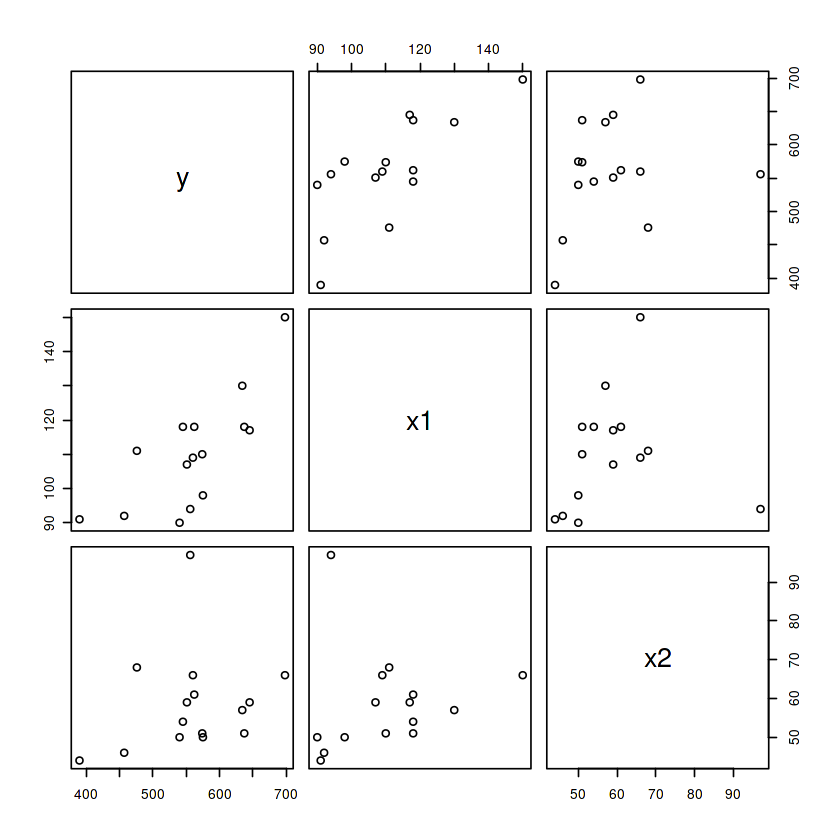

In [106]:
#a
plot(soap)

In [107]:
> **The above scatterplt matrix depicts the relation between different regressors and the target variables.**

ERROR: Error in parse(text = x, srcfile = src): <text>:1:1: unexpected '>'
1: >
    ^


In [ ]:
#b
m2=lm(y~x1+x2,data=soap)

In [108]:
S2=summary(m2)
S2


Call:
lm(formula = y ~ x1 + x2, data = soap)

Residuals:
    Min      1Q  Median      3Q     Max 
-94.655 -27.981   1.905  38.497  65.025 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) 124.0641   113.2422   1.096  0.29477   
x1            3.5120     0.8975   3.913  0.00206 **
x2            0.8346     1.1346   0.736  0.47611   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 54.46 on 12 degrees of freedom
Multiple R-squared:  0.5831,	Adjusted R-squared:  0.5137 
F-statistic: 8.393 on 2 and 12 DF,  p-value: 0.005248


In [109]:
> **The multiple linear regression model is y= 124.06 + 3.5120*x1+ 0.8346*x2**

ERROR: Error in parse(text = x, srcfile = src): <text>:1:1: unexpected '>'
1: >
    ^


In [110]:
#c
R2=S2$r.squared
R2

Adj_R2=S2$adj.r.squared
Adj_R2

[1] 0.5831302

[1] 0.5136519

In [111]:
> **Variation explained by R squared is 51%**

ERROR: Error in parse(text = x, srcfile = src): <text>:1:1: unexpected '>'
1: >
    ^


In [ ]:
#d
CI=confint(m2,level=0.90)
CI

In [ ]:
*  **The 90% CI for x1 is (1.9124, 5.1115)**
*  **The 90% CI for x2 is (-1.1876, 2.8568)**

In [ ]:
#e
new_data = read.csv('../input/practical-2-dataset-tsf/test1.csv')

datanew=new_data[,-1]


pred_new = predict(m2,newdata = datanew, interval = 'confidence',level=0.90)
pred_new

In [112]:
# Q3] Marks.csv

In [113]:
marks=read.csv("../input/data-set-for-prac2/marks.csv")
head(marks)

,X,y,x1,x2
,<int>,<int>,<int>,<int>
1,1,476,111,68
2,2,457,92,46
3,3,540,90,50
4,4,551,107,59
5,5,575,98,50
6,6,698,150,66


In [114]:
#a
m3=lm(y~x1+x2,data=marks)

In [115]:
S3=summary(m3)
S3


Call:
lm(formula = y ~ x1 + x2, data = marks)

Residuals:
    Min      1Q  Median      3Q     Max 
-94.655 -27.981   1.905  38.497  65.025 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) 124.0641   113.2422   1.096  0.29477   
x1            3.5120     0.8975   3.913  0.00206 **
x2            0.8346     1.1346   0.736  0.47611   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 54.46 on 12 degrees of freedom
Multiple R-squared:  0.5831,	Adjusted R-squared:  0.5137 
F-statistic: 8.393 on 2 and 12 DF,  p-value: 0.005248


In [116]:
> **Multiple Regression Model is y = 124.0641 + 3.5120*x1 + 0.8346*x2**

ERROR: Error in parse(text = x, srcfile = src): <text>:1:1: unexpected '>'
1: >
    ^


In [ ]:
#b
R2=S3$r.squared
R2

Adj_R2=S3$adj.r.squared
Adj_R2

In [ ]:
> **Variation explained by R squared is 51%**

In [ ]:
S4=summary(S3)
S4

In [ ]:
* For x1 reject H0 B1=0; p<0.05
* For x2 accept H0 B2=0;  p>0.05

In [ ]:
> **As p-value is less than significance level in case of coefficients of x1,we reject the null hypothesis (H01).In case of coefficients of x2, we accept the null hypothesis H02 because the p-value is greater than the significance level.**

In [ ]:
# Subset Selection CW

In [117]:
**Subset selection** evaluates a subset of features as a group for suitability. Subset selection algorithms can be broken up into wrappers, filters, and embedded methods. Wrappers use a search algorithm to search through the space of possible features and evaluate each subset by running a model on the subset. Wrappers can be computationally expensive and have a risk of over fitting to the model.

ERROR: Error in parse(text = x, srcfile = src): <text>:1:1: unexpected '^'
1: **
    ^


In [118]:
#Define function
mypack <- function(package){
  new.package <- package[!(package %in% installed.packages()[, "Package"])]
  if (length(new.package)) 
    install.packages(new.package, dependencies = TRUE)
  sapply(package, require, character.only = TRUE)
}

#create a vector of most used R packages
packages <- c("aprean3","olsrr")
              
mypack(packages)

aprean3   olsrr 
   TRUE    TRUE

In [119]:
data2=dse12a

In [120]:
head(data2)

,x1,x2,x3,x4,y
,<int>,<int>,<int>,<int>,<int>
1,20,50,75,15,27
2,27,55,60,20,23
3,22,62,68,16,18
4,27,55,60,20,26
5,24,75,72,8,23
6,30,62,73,18,27


In [121]:
model2=lm(y~.,data=data2)

In [122]:
summary(model2)


Call:
lm(formula = y ~ ., data = data2)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.4094 -1.5723 -0.4648  2.1059  4.4056 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) 22.62458    7.81875   2.894  0.01256 * 
x1           0.46793    0.11379   4.112  0.00123 **
x2          -0.23519    0.08561  -2.747  0.01663 * 
x3           0.15573    0.13362   1.166  0.26475   
x4          -0.40735    0.09815  -4.150  0.00114 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.682 on 13 degrees of freedom
Multiple R-squared:  0.6895,	Adjusted R-squared:  0.594 
F-statistic: 7.218 on 4 and 13 DF,  p-value: 0.002736


In [123]:
k=ols_step_all_possible(model2)

In [124]:
k
#2^4-1=15

,mindex,n,predictors,rsquare,adjr,predrsq,cp,aic,sbic,sbc,msep,fpe,apc,hsp
,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4,1,1,x4,0.272869785,0.22742415,0.04646417,16.446368,102.05403,49.00283,104.72514,246.5181,15.204652,0.9089128,0.9122791
1,2,1,x1,0.139139762,0.08533600,-0.12315516,22.045906,105.09291,51.50730,107.76402,291.8564,18.001013,1.0760753,1.0800608
2,3,1,x2,0.003515972,-0.05876428,-0.33712591,27.724740,107.72632,53.72352,110.39744,337.8368,20.836973,1.2456050,1.2502184
3,4,1,x3,0.002256818,-0.06010213,-0.23931590,27.777463,107.74905,53.74283,110.42017,338.2637,20.863303,1.2471790,1.2517982
7,5,2,x1 x4,0.505756583,0.43985746,0.25827317,8.694941,97.10464,45.20760,100.66612,179.5315,11.575059,0.6919408,0.7086771
9,6,2,x2 x4,0.285261071,0.18996255,-0.09777630,17.927520,103.74464,49.95389,107.30613,259.6254,16.739009,1.0006345,1.0248373
10,7,2,x3 x4,0.279102768,0.18298314,-0.04402551,18.185381,103.89907,50.06925,107.46055,261.8624,16.883235,1.0092561,1.0336675
5,8,2,x1 x2,0.256819548,0.15772882,-0.06573332,19.118423,104.44703,50.48042,108.00852,269.9567,17.405103,1.0404526,1.0656185
6,9,2,x1 x3,0.143035469,0.02877353,-0.25033061,23.882785,107.01127,52.44254,110.57275,311.2882,20.069898,1.1997503,1.2287692


In [125]:
k2=cbind(k,k$aic,k$sbic)
k3=k2[,c(1:5,8,9)]
k3

,mindex,n,predictors,rsquare,adjr,aic,sbic
,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
4,1,1,x4,0.272869785,0.22742415,102.05403,49.00283
1,2,1,x1,0.139139762,0.08533600,105.09291,51.50730
2,3,1,x2,0.003515972,-0.05876428,107.72632,53.72352
3,4,1,x3,0.002256818,-0.06010213,107.74905,53.74283
7,5,2,x1 x4,0.505756583,0.43985746,97.10464,45.20760
9,6,2,x2 x4,0.285261071,0.18996255,103.74464,49.95389
10,7,2,x3 x4,0.279102768,0.18298314,103.89907,50.06925
5,8,2,x1 x2,0.256819548,0.15772882,104.44703,50.48042
6,9,2,x1 x3,0.143035469,0.02877353,107.01127,52.44254


Warning message:
“It is deprecated to specify `guide = FALSE` to remove a guide. Please use `guide = "none"` instead.”
Warning message:
“It is deprecated to specify `guide = FALSE` to remove a guide. Please use `guide = "none"` instead.”
Warning message:
“It is deprecated to specify `guide = FALSE` to remove a guide. Please use `guide = "none"` instead.”
Warning message:
“It is deprecated to specify `guide = FALSE` to remove a guide. Please use `guide = "none"` instead.”
Warning message:
“It is deprecated to specify `guide = FALSE` to remove a guide. Please use `guide = "none"` instead.”
Warning message:
“It is deprecated to specify `guide = FALSE` to remove a guide. Please use `guide = "none"` instead.”
Warning message:
“It is deprecated to specify `guide = FALSE` to remove a guide. Please use `guide = "none"` instead.”
Warning message:
“It is deprecated to specify `guide = FALSE` to remove a guide. Please use `guide = "none"` instead.”
Warning message:
“It is deprecated to specify `g

[[1]]
NULL

[[2]]
NULL


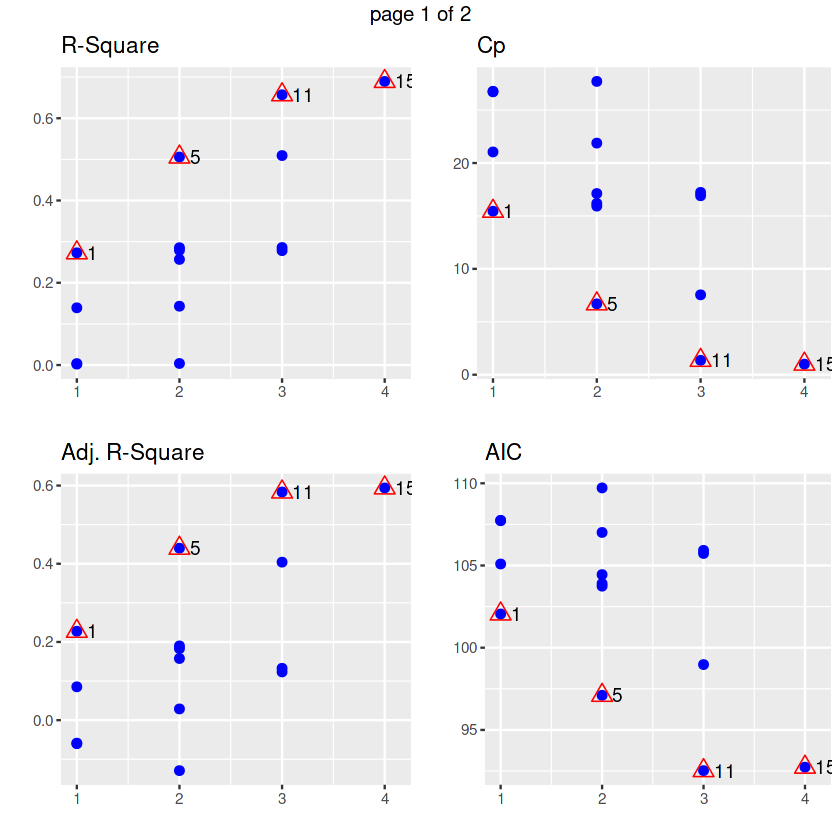

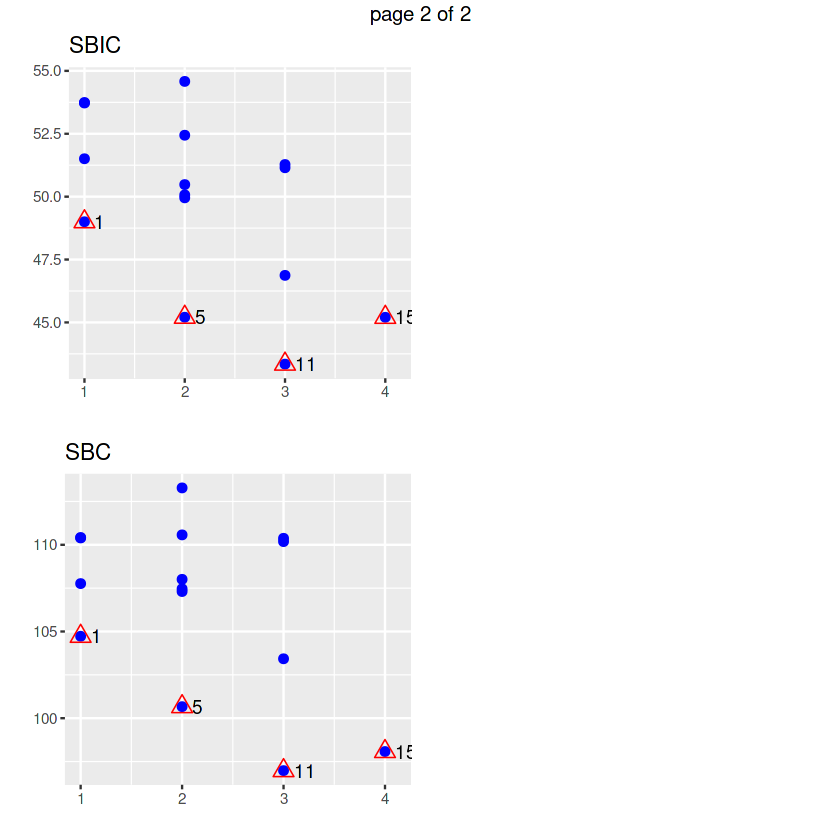

In [126]:
plot(k)

In [127]:
k_forward=ols_step_forward_aic(model2,details=TRUE)

Forward Selection Method 
------------------------

Candidate Terms: 

1 . x1 
2 . x2 
3 . x3 
4 . x4 

 Step 0: AIC = 105.7897 
 y ~ 1 

---------------------------------------------------------------------
Variable     DF      AIC      Sum Sq      RSS      R-Sq     Adj. R-Sq 
---------------------------------------------------------------------
x4            1    102.054    82.164    218.947    0.273        0.227 
x1            1    105.093    41.897    259.215    0.139        0.085 
x2            1    107.726     1.059    300.052    0.004       -0.059 
x3            1    107.749     0.680    300.432    0.002       -0.060 
---------------------------------------------------------------------


- x4 


 Step 1 : AIC = 102.054 
 y ~ x4 

---------------------------------------------------------------------
Variable     DF      AIC      Sum Sq      RSS      R-Sq     Adj. R-Sq 
---------------------------------------------------------------------
x1            1     97.105    70.125    1

In [128]:
ols_step_both_aic(model2,details=TRUE)

Stepwise Selection Method 
-------------------------

Candidate Terms: 

1 . x1 
2 . x2 
3 . x3 
4 . x4 

 Step 0: AIC = 105.7897 
 y ~ 1 


Variables Entered/Removed: 

                          Enter New Variables                        
---------------------------------------------------------------------
Variable     DF      AIC      Sum Sq      RSS      R-Sq     Adj. R-Sq 
---------------------------------------------------------------------
x4            1    102.054    82.164    218.947    0.273        0.227 
x1            1    105.093    41.897    259.215    0.139        0.085 
x2            1    107.726     1.059    300.052    0.004       -0.059 
x3            1    107.749     0.680    300.432    0.002       -0.060 
---------------------------------------------------------------------

- x4 added 


 Step 1 : AIC = 102.054 
 y ~ x4 

                          Enter New Variables                         
----------------------------------------------------------------------
Var



                               Stepwise Summary                                
-----------------------------------------------------------------------------
Variable     Method       AIC        RSS      Sum Sq      R-Sq      Adj. R-Sq 
-----------------------------------------------------------------------------
x4          addition    102.054    218.947     82.164    0.27287      0.22742 
x1          addition     97.105    148.822    152.289    0.50576      0.43986 
x2          addition     92.525    103.255    197.856    0.65709      0.58361 
-----------------------------------------------------------------------------


In [129]:
ols_step_backward_aic(model2,details=TRUE)

Backward Elimination Method 
---------------------------

Candidate Terms: 

1 . x1 
2 . x2 
3 . x3 
4 . x4 

 Step 0: AIC = 92.73572 
 y ~ x1 + x2 + x3 + x4 

----------------------------------------------------------------------
Variable     DF      AIC      Sum Sq       RSS      R-Sq     Adj. R-Sq 
----------------------------------------------------------------------
x3           1      92.525      9.769    103.255    0.657        0.584 
x2           1      98.975     54.271    147.757    0.509        0.404 
x1           1     105.734    121.599    215.085    0.286        0.133 
x4           1     105.923    123.875    217.361    0.278        0.123 
----------------------------------------------------------------------


Variables Removed: 

- x3 


  Step 1 : AIC = 92.52471 
 y ~ x1 + x2 + x4 

----------------------------------------------------------------------
Variable     DF      AIC      Sum Sq       RSS      R-Sq     Adj. R-Sq 
----------------------------------------------



                    Backward Elimination Summary                    
------------------------------------------------------------------
Variable       AIC        RSS      Sum Sq      R-Sq      Adj. R-Sq 
------------------------------------------------------------------
Full Model    92.736     93.486    207.625    0.68953      0.59400 
x3            92.525    103.255    197.856    0.65709      0.58361 
------------------------------------------------------------------


In [130]:
ols_step_both_aic(model2,details=TRUE)

Stepwise Selection Method 
-------------------------

Candidate Terms: 

1 . x1 
2 . x2 
3 . x3 
4 . x4 

 Step 0: AIC = 105.7897 
 y ~ 1 


Variables Entered/Removed: 

                          Enter New Variables                        
---------------------------------------------------------------------
Variable     DF      AIC      Sum Sq      RSS      R-Sq     Adj. R-Sq 
---------------------------------------------------------------------
x4            1    102.054    82.164    218.947    0.273        0.227 
x1            1    105.093    41.897    259.215    0.139        0.085 
x2            1    107.726     1.059    300.052    0.004       -0.059 
x3            1    107.749     0.680    300.432    0.002       -0.060 
---------------------------------------------------------------------

- x4 added 


 Step 1 : AIC = 102.054 
 y ~ x4 

                          Enter New Variables                         
----------------------------------------------------------------------
Var



                               Stepwise Summary                                
-----------------------------------------------------------------------------
Variable     Method       AIC        RSS      Sum Sq      R-Sq      Adj. R-Sq 
-----------------------------------------------------------------------------
x4          addition    102.054    218.947     82.164    0.27287      0.22742 
x1          addition     97.105    148.822    152.289    0.50576      0.43986 
x2          addition     92.525    103.255    197.856    0.65709      0.58361 
-----------------------------------------------------------------------------


In [131]:
# Q4

In [132]:
data_tml=read.csv("../input/subset-selection/Thermal.csv")

In [133]:
head(data_tml)

,y,x1,x2,x3,x4,x5,x6,x7,x8
,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>
1,18.90,350,165,260,8.00,2.56,4,3,200.3
2,17.00,350,170,275,8.50,2.56,4,3,199.6
3,20.00,250,105,185,8.25,2.73,1,3,196.7
4,18.25,351,143,255,8.00,3.00,2,3,199.9
5,20.07,225,95,170,8.40,2.76,1,3,194.1
6,11.20,440,215,330,8.20,2.88,4,3,184.5


In [134]:
model3=lm(y~.,data=data_tml)

In [135]:
#a
k=ols_step_all_possible(model3)

In [136]:
k

,mindex,n,predictors,rsquare,adjr,predrsq,cp,aic,sbic,sbc,msep,fpe,apc,hsp
,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,x1,0.7722712,0.76468028,0.72752003,-2.7195044,166.4296,76.53944,170.8268,300.6532,9.981280,0.2580926,0.3239361
3,2,1,x3,0.7116861,0.70207566,0.66061340,4.0061368,173.9782,83.16540,178.3754,380.6391,12.636707,0.3267557,0.4101162
2,3,1,x2,0.6510549,0.63942340,0.59446957,10.7368950,180.0859,88.51769,184.4831,460.6860,15.294154,0.3954711,0.4963620
8,4,1,x8,0.5694537,0.55510215,0.49966494,19.7955622,186.8104,94.45797,191.2076,568.4179,18.870710,0.4879525,0.6124368
7,5,1,x7,0.5212926,0.50533571,0.43424864,25.1419914,190.2035,97.48353,194.6007,632.0014,20.981594,0.5425350,0.6809442
5,6,1,x5,0.3537709,0.33222991,0.26418736,43.7388198,199.8056,106.16406,204.2028,853.1677,28.324019,0.7323930,0.9192380
6,7,1,x6,0.2371662,0.21173844,0.15655901,56.6832695,205.1139,111.03930,209.5111,1007.1121,33.434765,0.8645449,1.0851039
4,8,1,x4,0.1271267,0.09803095,0.01415198,68.8989130,209.4259,115.03768,213.8231,1152.3890,38.257762,0.9892564,1.2416312
13,9,2,x1 x6,0.7872928,0.77262333,0.73434046,-2.3870682,166.2460,77.31272,172.1089,290.8507,9.928027,0.2567156,0.3241805


In [137]:
k2=cbind(k,k$aic,k$sbic)
k3=k2[,c(1:5,8,9)]
k3

,mindex,n,predictors,rsquare,adjr,aic,sbic
,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,x1,0.7722712,0.76468028,166.4296,76.53944
3,2,1,x3,0.7116861,0.70207566,173.9782,83.16540
2,3,1,x2,0.6510549,0.63942340,180.0859,88.51769
8,4,1,x8,0.5694537,0.55510215,186.8104,94.45797
7,5,1,x7,0.5212926,0.50533571,190.2035,97.48353
5,6,1,x5,0.3537709,0.33222991,199.8056,106.16406
6,7,1,x6,0.2371662,0.21173844,205.1139,111.03930
4,8,1,x4,0.1271267,0.09803095,209.4259,115.03768
13,9,2,x1 x6,0.7872928,0.77262333,166.2460,77.31272


In [ ]:
plot(k)

Warning message:
“It is deprecated to specify `guide = FALSE` to remove a guide. Please use `guide = "none"` instead.”
Warning message:
“It is deprecated to specify `guide = FALSE` to remove a guide. Please use `guide = "none"` instead.”
Warning message:
“It is deprecated to specify `guide = FALSE` to remove a guide. Please use `guide = "none"` instead.”
Warning message:
“It is deprecated to specify `guide = FALSE` to remove a guide. Please use `guide = "none"` instead.”
Warning message:
“It is deprecated to specify `guide = FALSE` to remove a guide. Please use `guide = "none"` instead.”
Warning message:
“It is deprecated to specify `guide = FALSE` to remove a guide. Please use `guide = "none"` instead.”
Warning message:
“It is deprecated to specify `guide = FALSE` to remove a guide. Please use `guide = "none"` instead.”
Warning message:
“It is deprecated to specify `guide = FALSE` to remove a guide. Please use `guide = "none"` instead.”
Warning message:
“It is deprecated to specify `g

[[1]]
NULL

[[2]]
NULL


In [ ]:
**For 4 regressors the 93th subset is the optimal subset. For 2 regressors, 9th subset is the best subset.**

In [ ]:
#b
model3=lm(y~.,data=data_tml)
summary(model3)

In [ ]:
#c
k_forward=ols_step_forward_aic(model3,details=TRUE)

In [ ]:
**y = x1+x6**

In [ ]:
#d
ols_step_backward_aic(model3,details=TRUE)

In [ ]:
**y=x1+x6**

In [ ]:
#e
k_both=ols_step_both_aic(model3,details=TRUE)

In [ ]:
**y = x1+ x6**
# f] result analysis
* Forward: y=x1+x6
* Backward: y=x1+x6
* Stepwise:y=x1+x6

> Hence, all three subset selection processes gave same output.

In [ ]:
# Q5

In [ ]:
hald_data=read.csv("../input/subset-selection/Hald.csv")

In [ ]:
head(hald_data)

In [ ]:
hald_data=hald_data[,-1]

In [ ]:
head(hald_data)

In [ ]:
#a
model6=lm(y~. ,data=hald_data)
model6

In [ ]:
#b
rho=cor(hald_data)

In [ ]:
rho

In [ ]:
**The above correlation matrix shows the collinearity between the regressors**

In [ ]:
rho_inv=solve(rho)

In [ ]:
rho_inv

In [ ]:
VIF_j=diag(rho_inv)

In [ ]:
VIF_j

In [ ]:
**For all the regressors the variance inflation factor is greater than 10. Therefore multicollinearity is significant.**